In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Nadam

from tensorflow.keras.datasets import fashion_mnist

import numpy as np
from types import SimpleNamespace
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import random
np.random.seed(1) #for numpy
random.seed(1)
tf.random.set_seed(1) #for tensorflowimport random

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

img_width = 28
img_height = 28

labels = [
          "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
          ]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape input data
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]


x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Val: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Val: X=(5000, 28, 28, 1), y=(5000, 10)
Test: X=(5000, 28, 28, 1), y=(5000, 10)


# Part One

## 1) Train, Validate, Underfitting, and Overfitting

In [ ]:
input = layers.Input(shape=(img_height, img_width, 1))
x = layers.BatchNormalization()(input)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(input, output, name='fashion_model')

In [ ]:
model.summary()

Model: "fashion_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 1)         4         
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)     

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
EPOCHS = 5
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCHS, validation_data=(x_val, y_val))

Epoch 1/5
938/938 [==============================] - 12s 9ms/step - loss: 0.6065 - accuracy: 0.7798 - val_loss: 0.3861 - val_accuracy: 0.8638
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.3855 - accuracy: 0.8610 - val_loss: 0.3332 - val_accuracy: 0.8816
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.3391 - accuracy: 0.8780 - val_loss: 0.2992 - val_accuracy: 0.8938
Epoch 4/5
938/938 [==============================] - 9s 9ms/step - loss: 0.3101 - accuracy: 0.8884 - val_loss: 0.2881 - val_accuracy: 0.9042
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2891 - accuracy: 0.8952 - val_loss: 0.2577 - val_accuracy: 0.9112


In [75]:
model.summary()

Model: "fashion_model_overfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 1

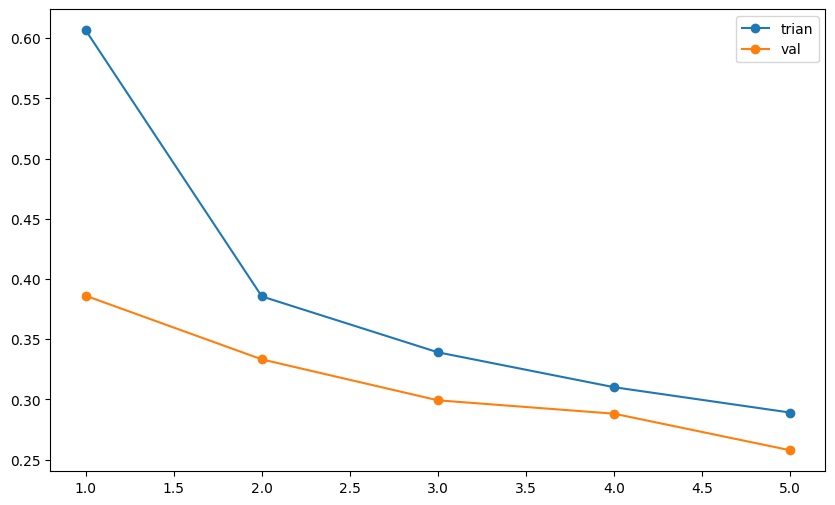

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), history.history['loss'], marker='o')
plt.plot(range(1, EPOCHS+1), history.history['val_loss'], marker='o')
plt.legend(['trian', 'val'])
plt.show()

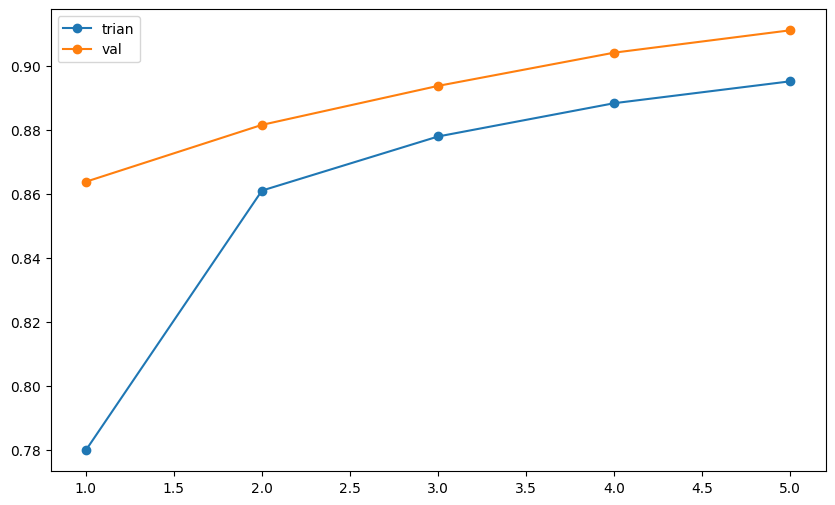

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), history.history['accuracy'], marker='o')
plt.plot(range(1, EPOCHS+1), history.history['val_accuracy'], marker='o')
plt.legend(['trian', 'val'])
plt.show()

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

157/157 - 1s - loss: 0.2567 - accuracy: 0.9062 - 638ms/epoch - 4ms/step
Test loss: 0.25670191645622253
Test accuracy: 0.9061999917030334


### Underfitting

In [ ]:
input = layers.Input(shape=(img_width, img_height, 1))
x = layers.Conv2D(2, (15, 15), padding='same', activation='relu')(input)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten()(x)
x = layers.Dense(4)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(input, output, name='fashion_model_underfit')
model.summary()

Model: "fashion_model_underfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 2)         452       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 2)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 2)         0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 4)                 1572      
                                            

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(0.2),
    metrics=["accuracy"],
)
EPOCHS = 5
history = model.fit(x_train, y_train, batch_size=512, epochs=EPOCHS, validation_data=(x_val, y_val))

Epoch 1/5
118/118 [==============================] - 2s 11ms/step - loss: 1.4227 - accuracy: 0.4671 - val_loss: 1.0520 - val_accuracy: 0.5890
Epoch 2/5
118/118 [==============================] - 1s 7ms/step - loss: 0.9059 - accuracy: 0.6426 - val_loss: 0.8105 - val_accuracy: 0.6822
Epoch 3/5
118/118 [==============================] - 1s 7ms/step - loss: 0.8307 - accuracy: 0.6790 - val_loss: 0.7655 - val_accuracy: 0.6992
Epoch 4/5
118/118 [==============================] - 1s 6ms/step - loss: 0.7800 - accuracy: 0.7096 - val_loss: 0.6914 - val_accuracy: 0.7512
Epoch 5/5
118/118 [==============================] - 1s 6ms/step - loss: 0.7523 - accuracy: 0.7201 - val_loss: 0.7816 - val_accuracy: 0.6952


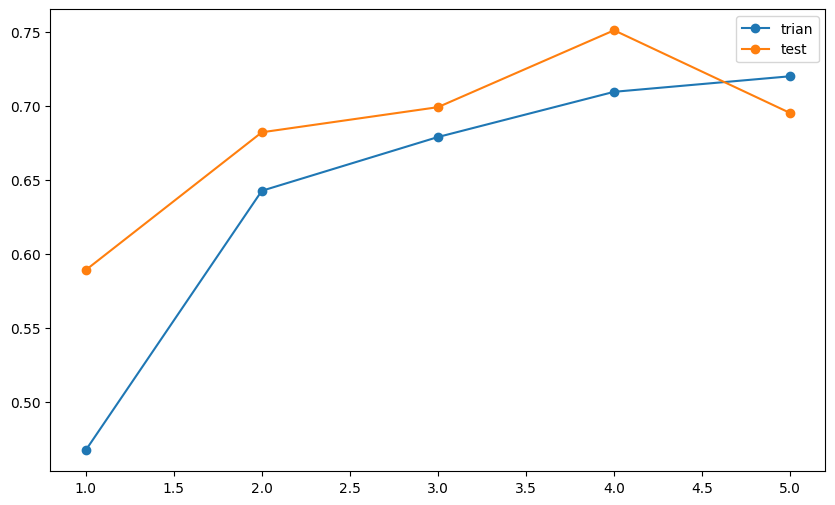

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), history.history['accuracy'], marker='o')
plt.plot(range(1, EPOCHS+1), history.history['val_accuracy'], marker='o')
plt.legend(['trian', 'test'])
plt.show()

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

157/157 - 0s - loss: 0.7806 - accuracy: 0.6878 - 332ms/epoch - 2ms/step
Test loss: 0.7806015014648438
Test accuracy: 0.6877999901771545


### Overfitting

In [ ]:
input = layers.Input(shape=(img_height, img_width, 1))
x = layers.BatchNormalization()(input)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(1024)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(input, output, name='fashion_model_overfit')
model.summary()

Model: "fashion_model_overfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 1

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

EPOCHS = 5
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCHS, validation_data=(x_val, y_val))

Epoch 1/5
938/938 [==============================] - 11s 10ms/step - loss: 0.5658 - accuracy: 0.8340 - val_loss: 0.3833 - val_accuracy: 0.8626
Epoch 2/5
938/938 [==============================] - 9s 9ms/step - loss: 0.2659 - accuracy: 0.9050 - val_loss: 0.2996 - val_accuracy: 0.8918
Epoch 3/5
938/938 [==============================] - 9s 9ms/step - loss: 0.2171 - accuracy: 0.9220 - val_loss: 0.3487 - val_accuracy: 0.8792
Epoch 4/5
938/938 [==============================] - 9s 10ms/step - loss: 0.1822 - accuracy: 0.9332 - val_loss: 0.3039 - val_accuracy: 0.9094
Epoch 5/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1543 - accuracy: 0.9444 - val_loss: 0.2643 - val_accuracy: 0.9146


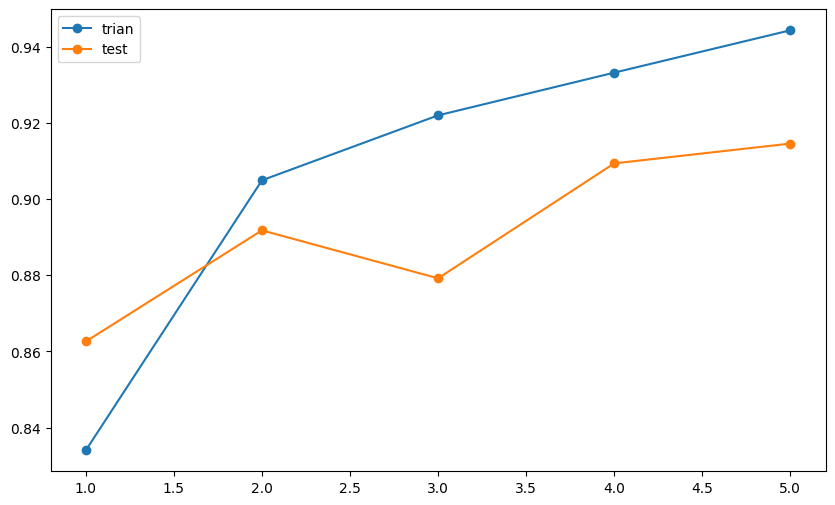

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), history.history['accuracy'], marker='o')
plt.plot(range(1, EPOCHS+1), history.history['val_accuracy'], marker='o')
plt.legend(['trian', 'test'])
plt.show()

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

157/157 - 1s - loss: 0.2368 - accuracy: 0.9112 - 616ms/epoch - 4ms/step
Test loss: 0.23681767284870148
Test accuracy: 0.9111999869346619


## 2) Hyperparameter Tuning

In [ ]:
%%capture
!pip3 install wandb
import wandb
from wandb.keras import WandbCallback

In [ ]:
sweep_config = {
    'method': 'random', #grid, random
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [2, 10, 20]
        },
        'batch_size': {
            'values': [128, 32]
        },
        'dropout': {
            'values': [0.35, 0.5]
        },
        'learning_rate': {
            'values': [6e-2, 1e-3, 3e-4]
        },
        # 'optimizer': {
        #     'values': ['adam', 'sgd', 'rmsprop']
        # }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="amir7d0", project="fashion_part2")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: ignored

In [ ]:
def train():
    config_defaults = {
        'epochs': 1,
        'batch_size': 128,
        'learning_rate': 1e-3,
        'optimizer': 'adam',
        'dropout': 0.5,
    }

    # Initialize a new wandb run
    wandb.init(config=config_defaults)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config

    input = layers.Input(shape=(img_height, img_width, 1))
    x = layers.BatchNormalization()(input)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(config.dropout)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(input, output, name='fashion_model2')


    # Define the optimizer
    if config.optimizer=='sgd':
      optimizer = SGD(lr=config.learning_rate)
    elif config.optimizer=='rmsprop':
      optimizer = RMSprop(lr=config.learning_rate, decay=1e-5)
    elif config.optimizer=='adam':
      optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    elif config.optimizer=='nadam':
      optimizer = Nadam(lr=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    else:
      optimizer = SGD(lr=config.learning_rate)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=config.batch_size,
              epochs=config.epochs,
              validation_data=(x_val, y_val),
              callbacks=[WandbCallback(data_type="image", validation_data=(x_val, y_val), labels=labels)]
    )

In [ ]:
wandb.agent(sweep_id, train, count=50)

In [ ]:
def train_best_model():
    best_config = {
        'epochs': 20,
        'batch_size': 32,
        'learning_rate': 3e-4,
        'optimizer': 'adam',
        'dropout': 0.35,
    }
    config = SimpleNamespace(**best_config)


    input = layers.Input(shape=(img_height, img_width, 1))
    x = layers.BatchNormalization()(input)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(config.dropout)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(input, output, name='fashion_model2')


    # Define the optimizer
    if config.optimizer=='sgd':
      optimizer = SGD(lr=config.learning_rate)
    elif config.optimizer=='rmsprop':
      optimizer = RMSprop(lr=config.learning_rate, decay=1e-5)
    elif config.optimizer=='adam':
      optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    elif config.optimizer=='nadam':
      optimizer = Nadam(lr=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    else:
      optimizer = SGD(lr=config.learning_rate)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=config.batch_size,
              epochs=config.epochs,
              validation_data=(x_val, y_val),
            #   callbacks=[WandbCallback(data_type="image",
                                    #    validation_data=(x_val, y_val),
                                    #    labels=labels,
                                    #    )]
    )

    scores = model.evaluate(x_test, y_test, batch_size=64, verbose=2)
    return scores

train_best_model()

In [ ]:
# test loss: 0.22, test accuracy: 0.92

# Part Two

In [ ]:
x_train2 = np.repeat(x_train, 3, -1)
x_test2 = np.repeat(x_test, 3, -1)
x_val2 = np.repeat(x_val, 3, -1)

In [ ]:
%%capture
!pip3 install wandb
import wandb
from wandb.keras import WandbCallback

## 1) finetune

In [ ]:
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [1e-2, 3e-2, 6e-2, 1e-3, 3e-4]
        }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="amir7d0", project="fashion_finetuning")

In [ ]:
def train():
    config_defaults = {
        'learning_rate': 1e-3
    }
    wandb.init(config=config_defaults)
    config = wandb.config

    from keras.applications.inception_v3 import InceptionV3
    inc_model = InceptionV3(include_top=False, weights='imagenet')

    for layer in inc_model.layers:
        layer.trainable = True

    input = layers.Input(shape=(img_height, img_width, 3))
    x = layers.ZeroPadding2D(padding=(160-28)//2+1)(input)
    x = inc_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output, name='fashion_finetuning')

    optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train2, y_train, batch_size=64,
              epochs=10,
              validation_data=(x_val2, y_val),
              callbacks=[WandbCallback(data_type="image", validation_data=(x_val2, y_val), labels=labels)]
    )


In [ ]:
wandb.agent(sweep_id, train)

In [ ]:
# در نرخ یادگیری 0.0003 مقدار دقت بهتر است پس در ادامه با اجرای تعداد ایپاک بیشتر با همین
# تنظیمات، مدل را ارزیابی میکنیم

In [ ]:
def train_best_model():
    best_config = {
        'learning_rate': 3e-4
    }
    config = SimpleNamespace(**best_config)

    from keras.applications.inception_v3 import InceptionV3
    inc_model = InceptionV3(include_top=False, weights='imagenet')

    for layer in inc_model.layers:
        layer.trainable = True

    input = layers.Input(shape=(img_height, img_width, 3))
    x = layers.ZeroPadding2D(padding=(160-28)//2+1)(input)
    x = inc_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output, name='fashion_finetuning')

    optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train2, y_train, batch_size=64,
              epochs=20,
              validation_data=(x_val2, y_val),
    )

    scores = model.evaluate(x_test2, y_test, batch_size=64, verbose=2)
    return scores

train_best_model()

In [ ]:
# test loss: 0.329, test accuracy: 0.922

## 2) feature extraction

In [ ]:
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [1e-2, 3e-2, 6e-2, 1e-3, 3e-4]
        }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="amir7d0", project="fashion_feature_extraction")

In [ ]:
def train_feature():
    config_defaults = {
        'learning_rate': 1e-3
    }

    wandb.init(config=config_defaults)
    config = wandb.config

    from keras.applications.inception_v3 import InceptionV3
    inc_model = InceptionV3(include_top=False, weights='imagenet')

    # for layer in inc_model.layers:
    #     layer.trainable = False
    inc_model.trainable = False

    input = layers.Input(shape=(img_height, img_width, 3))
    x = layers.ZeroPadding2D(padding=(160-28)//2+1)(input)
    x = inc_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output, name='fashion_feature_extraction')

    optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train2, y_train, batch_size=64,
              epochs=10,
              validation_data=(x_val2, y_val),
              callbacks=[WandbCallback(validation_data=(x_val2, y_val))]
    )

In [ ]:
wandb.agent(sweep_id, train_feature)

In [ ]:
# در نرخ یادگیری 0.0003 مقدار دقت بهتر است پس در ادامه با اجرای تعداد ایپاک بیشتر با همین
# تنظیمات، مدل را ارزیابی میکنیم

In [ ]:
def train_best_model():
    best_config = {
        'learning_rate': 3e-4,
    }
    config = SimpleNamespace(**best_config)

    from keras.applications.inception_v3 import InceptionV3
    inc_model = InceptionV3(include_top=False, weights='imagenet')


    input = layers.Input(shape=(img_height, img_width, 3))
    x = layers.ZeroPadding2D(padding=(160-28)//2+1)(input)
    x = inc_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output, name='fashion_finetuning')

    for layer in inc_model.layers:
        layer.trainable = False

    optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train2, y_train, batch_size=64,
              epochs=20,
              validation_data=(x_val2, y_val)
    )

    scores = model.evaluate(x_test2, y_test, batch_size=64, verbose=2)
    return scores

train_best_model()

In [ ]:
# test loss: 0.418, test accuracy: 0.865